<a href="https://colab.research.google.com/github/abhiruchi97/Econometrics-in-Python/blob/master/OLS_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

#OLS regression in Statsmodels


> ### We create a data set to study the determinants of the natural rate of unemployment for the United States between October 1960 and March 1997

* Data frequency: Monthly
* Data source: St. Louis FRED, Bureau of Labor Statistics (BLS)



In [19]:
data = pd.read_csv('dissert_dataset__instrumentalvar.csv')
data.columns = ["date","natural_rate", "sect_shifts", "real_unemp_benef", "log_growth","real_hrly_wage", "real_min_wage", "lab_force_grwth", 'pers_cnsmp', 'time']
data.head()

,date,natural_rate,sect_shifts,real_unemp_benef,log_growth,real_hrly_wage,real_min_wage,lab_force_grwth,pers_cnsmp,time
0,1960-10-01,5.476770,0.014062,7.896482,-0.013821,53.024000,1.0,-0.001567,17.255,1
1,1960-11-01,5.479093,0.024561,7.934455,-0.008383,53.009930,1.0,-0.003343,17.301,2
2,1960-12-01,5.481434,0.056744,7.923337,0.001977,53.145433,1.0,-0.004058,17.295,3
3,1961-01-01,5.483794,0.030253,7.936679,0.002089,53.378375,1.0,-0.001098,17.300,4
4,1961-02-01,5.486174,0.019528,7.952802,0.005338,53.656624,1.0,-0.002347,17.317,5


In [0]:
#np.max(data.iloc[:,2])

In [21]:
for i in range(1,7):
  data.iloc[:,i] = data.iloc[:,i]/np.max(data.iloc[:,i])
data.head()

,date,natural_rate,sect_shifts,real_unemp_benef,log_growth,real_hrly_wage,real_min_wage,lab_force_grwth,pers_cnsmp,time
0,1960-10-01,0.877697,0.193335,0.934048,-0.857517,0.633390,0.210526,-0.001567,17.255,1
1,1960-11-01,0.878069,0.337677,0.938540,-0.520106,0.633222,0.210526,-0.003343,17.301,2
2,1960-12-01,0.878444,0.780147,0.937225,0.122672,0.634841,0.210526,-0.004058,17.295,3
3,1961-01-01,0.878822,0.415940,0.938803,0.129592,0.637623,0.210526,-0.001098,17.300,4
4,1961-02-01,0.879204,0.268481,0.940710,0.331178,0.640947,0.210526,-0.002347,17.317,5


### Data description

In [22]:
variable_labels = pd.DataFrame({'Variable': ['date', 'natural_rate', 'sect_shifts', 'real_unemp_benef', 'log_growth',
                                'real_hrly_wage', 'real_min_wage', 'lab_force_grwth', 'time'],
                       'Label': ['yyyy-mm-dd', 'natural rate of unemployment', 'percentage changes in sectoral composition by industry', 
                                 'real unemployment benefits per capita', 'log of growth of output', 'real hourly wage/compensation', 'real minimum wage', 
                                 'labor force growth rate', 'time trend']})
variable_labels

,Variable,Label
0,date,yyyy-mm-dd
1,natural_rate,natural rate of unemployment
2,sect_shifts,percentage changes in sectoral composition by ...
3,real_unemp_benef,real unemployment benefits per capita
4,log_growth,log of growth of output
5,real_hrly_wage,real hourly wage/compensation
6,real_min_wage,real minimum wage
7,lab_force_grwth,labor force growth rate
8,time,time trend


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438 entries, 0 to 437
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              438 non-null    object 
 1   natural_rate      438 non-null    float64
 2   sect_shifts       438 non-null    float64
 3   real_unemp_benef  438 non-null    float64
 4   log_growth        438 non-null    float64
 5   real_hrly_wage    438 non-null    float64
 6   real_min_wage     438 non-null    float64
 7   lab_force_grwth   438 non-null    float64
 8   pers_cnsmp        438 non-null    float64
 9   time              438 non-null    int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 34.3+ KB


### Assigning independent variables to 'X' for OLS

In [24]:
X = data.iloc[:, [2, 3, 4, 5, 6, 7, 9]]
y = data.iloc[:, 1]
X.head()

,sect_shifts,real_unemp_benef,log_growth,real_hrly_wage,real_min_wage,lab_force_grwth,time
0,0.193335,0.934048,-0.857517,0.633390,0.210526,-0.001567,1
1,0.337677,0.938540,-0.520106,0.633222,0.210526,-0.003343,2
2,0.780147,0.937225,0.122672,0.634841,0.210526,-0.004058,3
3,0.415940,0.938803,0.129592,0.637623,0.210526,-0.001098,4
4,0.268481,0.940710,0.331178,0.640947,0.210526,-0.002347,5


###Adding a column of 1's to the regressor matrix

In [0]:
X = sm.add_constant(X)

### Regression using OLS and saving results

In [27]:
model = sm.OLS(y, X)
results = model.fit(cov_type = 'HC3')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:           natural_rate   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     216.0
Date:                Fri, 08 May 2020   Prob (F-statistic):          1.85e-136
Time:                        12:50:18   Log-Likelihood:                 961.14
No. Observations:                 438   AIC:                            -1906.
Df Residuals:                     430   BIC:                            -1874.
Df Model:                           7                                         
Covariance Type:                  HC3                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0894      0.079  

### Regression Diagnostics
#### Normality of residuals

*   Jarque-Bera test



In [28]:
name = ['Jarque-Bera', 'Chi^2 two-tail prob.', 'Skew', 'Kurtosis']
test = sms.jarque_bera(results.resid)
lzip(name, test)

[('Jarque-Bera', 1.5156929918587292),
 ('Chi^2 two-tail prob.', 0.46867463376321183),
 ('Skew', -0.13298575534312373),
 ('Kurtosis', 3.1109541630136293)]

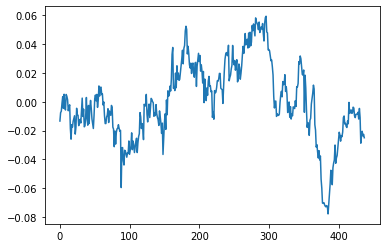

In [29]:
plt.plot(results.resid)

#### Heteroscedasticity


*   Breusch-Pagan test
*   Goldfeld-Quandt test



In [30]:
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid, results.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 132.8172971713582),
 ('p-value', 1.6198815526357453e-25),
 ('f-value', 26.73407355862392),
 ('f p-value', 1.985154479755174e-30)]

In [31]:
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(results.resid, results.model.exog)
lzip(name, test)

[('F statistic', 5.377808422655104), ('p-value', 2.5699253800007495e-31)]